In [1]:
import torch
import huggingface_hub
import utils

In [2]:
print('List of available models')
print(utils.get_available_models())
print('List of models trained on EGO4D')
indexes_ego = [i for i, x in enumerate(utils.get_available_models()) if 'ego' in x]
print( [utils.get_available_models()[i] for i in indexes_ego])

print('List of models trained on SAYCam')
indexes_say = [i for i, x in enumerate(utils.get_available_models()) if 'say' in x]
print([utils.get_available_models()[i] for i in indexes_say])

print('Only 2 compatible models are thus dino_ego4d-200h_vitb14 and dino_say_vitb14')


List of available models
['dino_say_vitb14', 'dino_s_vitb14', 'dino_a_vitb14', 'dino_y_vitb14', 'dino_sfp_vitb14', 'dino_imagenet100_vitb14', 'dino_imagenet10_vitb14', 'dino_imagenet1_vitb14', 'dino_kinetics-200h_vitb14', 'dino_ego4d-200h_vitb14', 'dino_say_resnext50', 'dino_s_resnext50', 'dino_a_resnext50', 'dino_y_resnext50', 'dino_sfp_resnext50', 'dino_say_vitl16', 'dino_s_vitl16', 'dino_a_vitl16', 'dino_y_vitl16', 'dino_say_vitb16', 'dino_s_vitb16', 'dino_a_vitb16', 'dino_y_vitb16', 'dino_say_vits16', 'dino_s_vits16', 'dino_a_vits16', 'dino_y_vits16', 'mugs_say_vitl16', 'mugs_s_vitl16', 'mugs_a_vitl16', 'mugs_y_vitl16', 'mugs_say_vitb16', 'mugs_s_vitb16', 'mugs_a_vitb16', 'mugs_y_vitb16', 'mugs_say_vits16', 'mugs_s_vits16', 'mugs_a_vits16', 'mugs_y_vits16', 'mae_say_vitl16', 'mae_s_vitl16', 'mae_a_vitl16', 'mae_y_vitl16', 'mae_say_vitb16', 'mae_s_vitb16', 'mae_a_vitb16', 'mae_y_vitb16', 'mae_say_vits16', 'mae_s_vits16', 'mae_a_vits16', 'mae_y_vits16']
List of models trained on EGO4

In [3]:
from utils import *

#model_say = load_model('dino_say_vitb14')
model_ego = load_model('dino_ego4d-200h_vitb14')

dino_ego4d-200h_vitb14.pth:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Take key teacher in provided checkpoint dict
Pretrained weights found at /data/alban/models/huggingface_hub/models--eminorhan--dino_ego4d-200h_vitb14/snapshots/6222b6a14c40a4dad7d935460da8226a90c7d225/dino_ego4d-200h_vitb14.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])


In [5]:
## Print model
#print(model_say)
print(model_ego)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (head): Identity()
)


Attentions min, max: tensor(4.3225e-07) tensor(0.0065)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(1.9484e-07) tensor(0.0290)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(2.5401e-07) tensor(0.0127)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(1.2251e-07) tensor(0.0106)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(2.5427e-07) tensor(0.0105)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(1.4816e-07) tensor(0.0143)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(2.4989e-08) tensor(0.0071)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(5.2932e-10) tensor(0.0158)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(3.3436e-09) tensor(0.0146)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(4.6304e-26) tensor(0.0255)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(8.6923e-09) tensor(0.0187)
torch.Size([12, 3, 1400, 1862])
Attentions min, max: tensor(0.) tensor(0.77

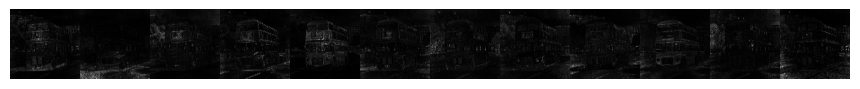

Image size: 16800 x 1400 pixels


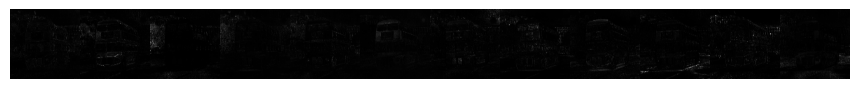

Image size: 16800 x 1400 pixels


In [6]:
img = preprocess_image("imgs/img_25.jpg", 1400)
with torch.no_grad():
    ### visualize attention over blocks
    for layer in range(1,13):
        visualize_attentions(model_ego, img, save_name = 'atts_EGO4D_baby', patch_size=14, layernum = layer)
    display_image('outputs_visualization/all_heads_atts_SAYCam_last.png')
    display_image('outputs_visualization/all_heads_atts_EGO4D_last.png')